<a href="https://colab.research.google.com/github/RafaelSantosIF/Regressao-Linear-com-Python/blob/main/Regress%C3%A3o_Linear_Pre%C3%A7os_de_Im%C3%B3veis_em_Amsterdan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Configurações para visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(font_scale=1.2)
pd.set_option('display.max_columns', None)

In [3]:
# 1. Carregamento e Exploração dos Dados
print("=== CARREGAMENTO E EXPLORAÇÃO DOS DADOS ===")

# Carregar os dados
# Definindo os nomes das colunas conforme especificado
data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv",
                  names=["Address", "Zip", "Price", "Area", "Room", "Lon", "Lat"], header=0)

data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Area'] = pd.to_numeric(data['Area'], errors='coerce')
data['Room'] = pd.to_numeric(data['Room'], errors='coerce')
data['Lon'] = pd.to_numeric(data['Lon'], errors='coerce')
data['Lat'] = pd.to_numeric(data['Lat'], errors='coerce')

# Visualizar as primeiras linhas
print("\nPrimeiras linhas do conjunto de dados:")
print(data.head())

=== CARREGAMENTO E EXPLORAÇÃO DOS DADOS ===

Primeiras linhas do conjunto de dados:
                                  Address      Zip     Price  Area  Room  \
1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64     3   
2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60     3   
3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109     4   
4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128     6   
5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   138     5   

        Lon        Lat  
1  4.907736  52.356157  
2  4.850476  52.348586  
3  4.944774  52.343782  
4  4.789928  52.343712  
5  4.902503  52.410538  


In [4]:
# Verificar informações do dataset
print("\nInformações do dataset:")
print(data.info())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 924 entries, 1 to 924
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Address  924 non-null    object 
 1   Zip      924 non-null    object 
 2   Price    920 non-null    float64
 3   Area     924 non-null    int64  
 4   Room     924 non-null    int64  
 5   Lon      924 non-null    float64
 6   Lat      924 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 57.8+ KB
None


In [5]:
# Estatísticas descritivas
print("\nEstatísticas descritivas:")
print(data.describe())


Estatísticas descritivas:
              Price        Area        Room         Lon         Lat
count  9.200000e+02  924.000000  924.000000  924.000000  924.000000
mean   6.220654e+05   95.952381    3.571429    4.888605   52.363326
std    5.389942e+05   57.447436    1.592332    0.053140    0.024028
min    1.750000e+05   21.000000    1.000000    4.644819   52.291519
25%    3.500000e+05   60.750000    3.000000    4.855834   52.352077
50%    4.670000e+05   83.000000    3.000000    4.886818   52.364631
75%    7.000000e+05  113.000000    4.000000    4.922337   52.377598
max    5.950000e+06  623.000000   14.000000    5.029122   52.423805


In [6]:
# Verificar dados faltantes
print("\nDados faltantes por coluna:")
missing_data = data.isnull().sum()
print(missing_data[missing_data > 0])


Dados faltantes por coluna:
Price    4
dtype: int64



=== ANÁLISE EXPLORATÓRIA DOS DADOS ===


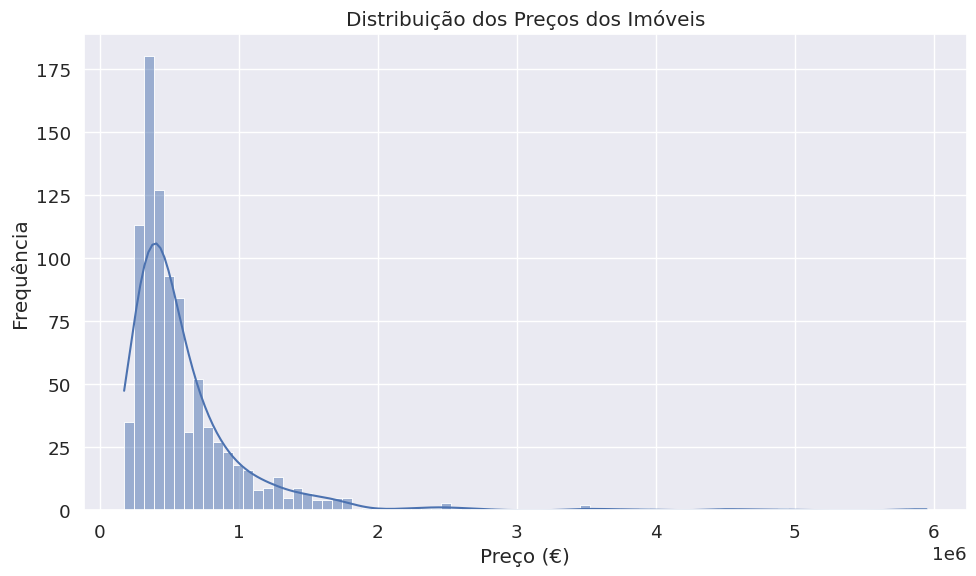

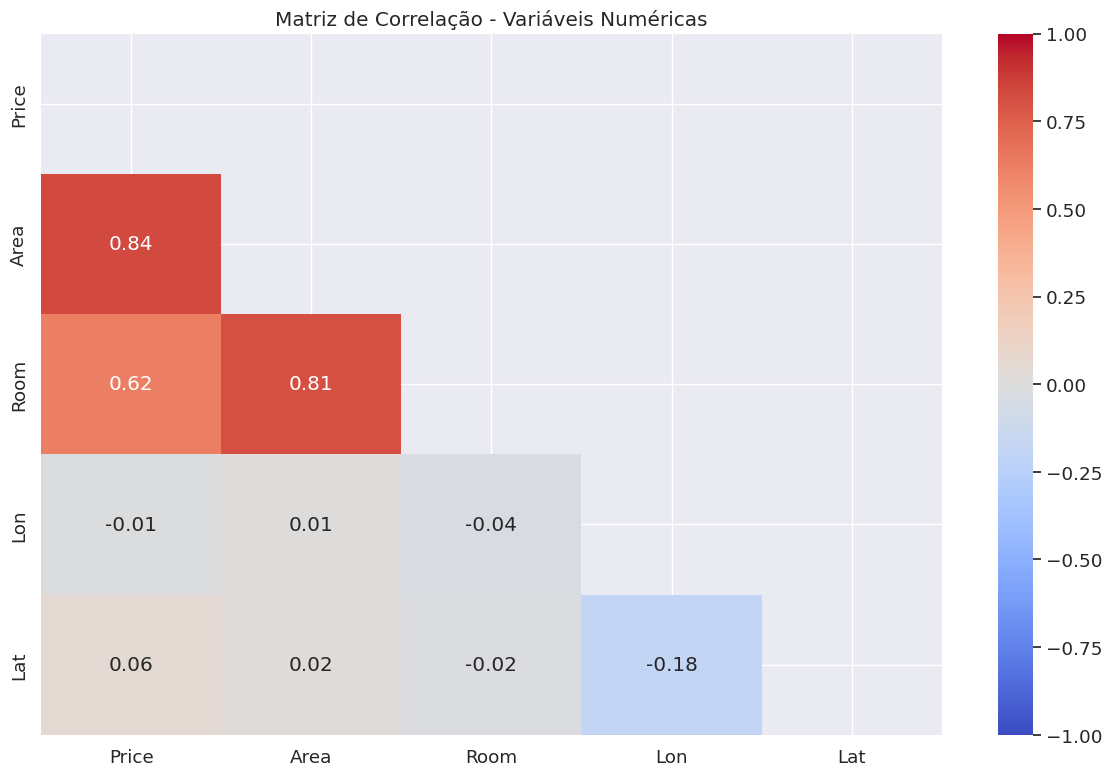

In [10]:
# 2. Análise Exploratória dos Dados
print("\n=== ANÁLISE EXPLORATÓRIA DOS DADOS ===")

# Analisar a distribuição da variável alvo (Price)
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], kde=True)
plt.title('Distribuição dos Preços dos Imóveis')
plt.xlabel('Preço (€)')
plt.ylabel('Frequência')
plt.tight_layout()
plt.savefig('distribuicao_precos.png')


# Análise de correlação
numeric_columns = data.select_dtypes(include=[np.number]).columns
correlation = data[numeric_columns].corr()

plt.figure(figsize=(12, 8))
mask = np.triu(correlation)
sns.heatmap(correlation, annot=True, fmt=".2f", cmap='coolwarm', mask=mask, vmin=-1, vmax=1)
plt.title('Matriz de Correlação - Variáveis Numéricas')
plt.tight_layout()
plt.savefig('matriz_correlacao.png')


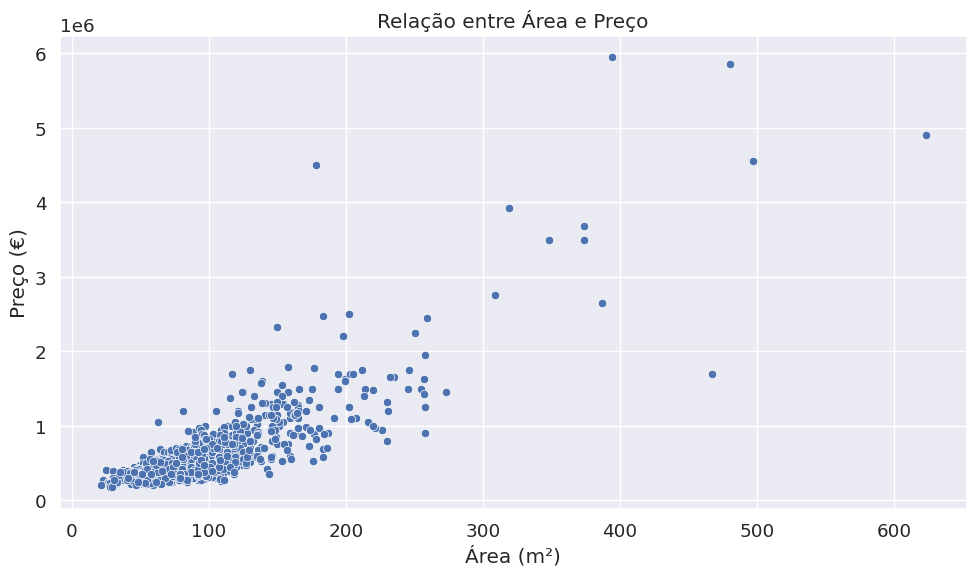

In [11]:
# Visualizar relação entre área e preço
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Area', y='Price', data=data)
plt.title('Relação entre Área e Preço')
plt.xlabel('Área (m²)')
plt.ylabel('Preço (€)')
plt.tight_layout()
plt.savefig('relacao_area_preco.png')


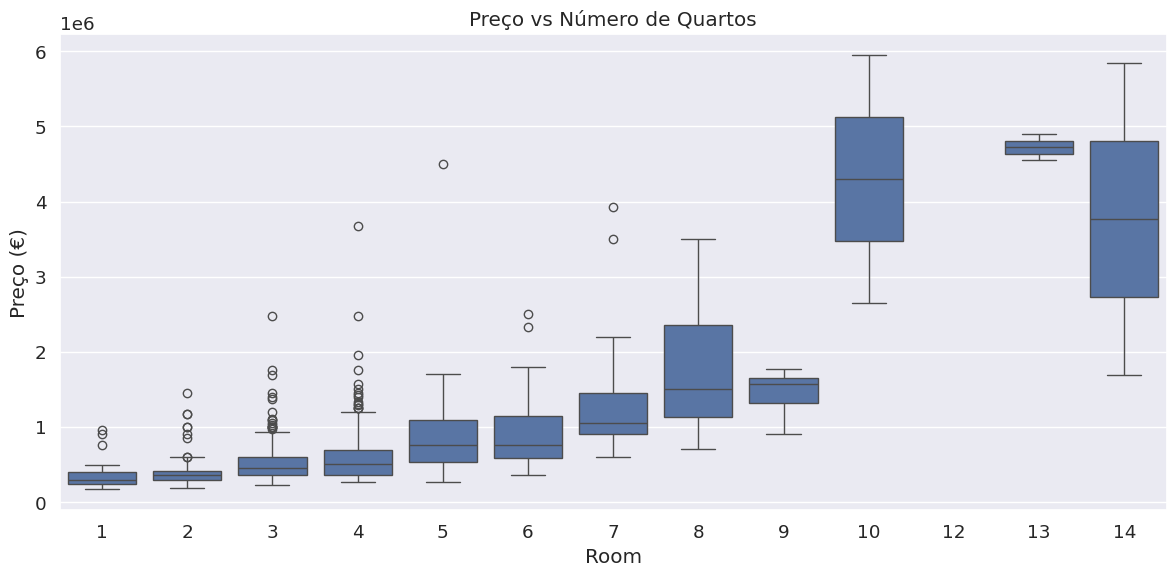

In [12]:
# Box plots para variáveis categóricas vs preço
plt.figure(figsize=(12, 6))
sns.boxplot(x='Room', y='Price', data=data)
plt.title('Preço vs Número de Quartos')
plt.ylabel('Preço (€)')
plt.tight_layout()
plt.savefig('boxplot_Room_preco.png')


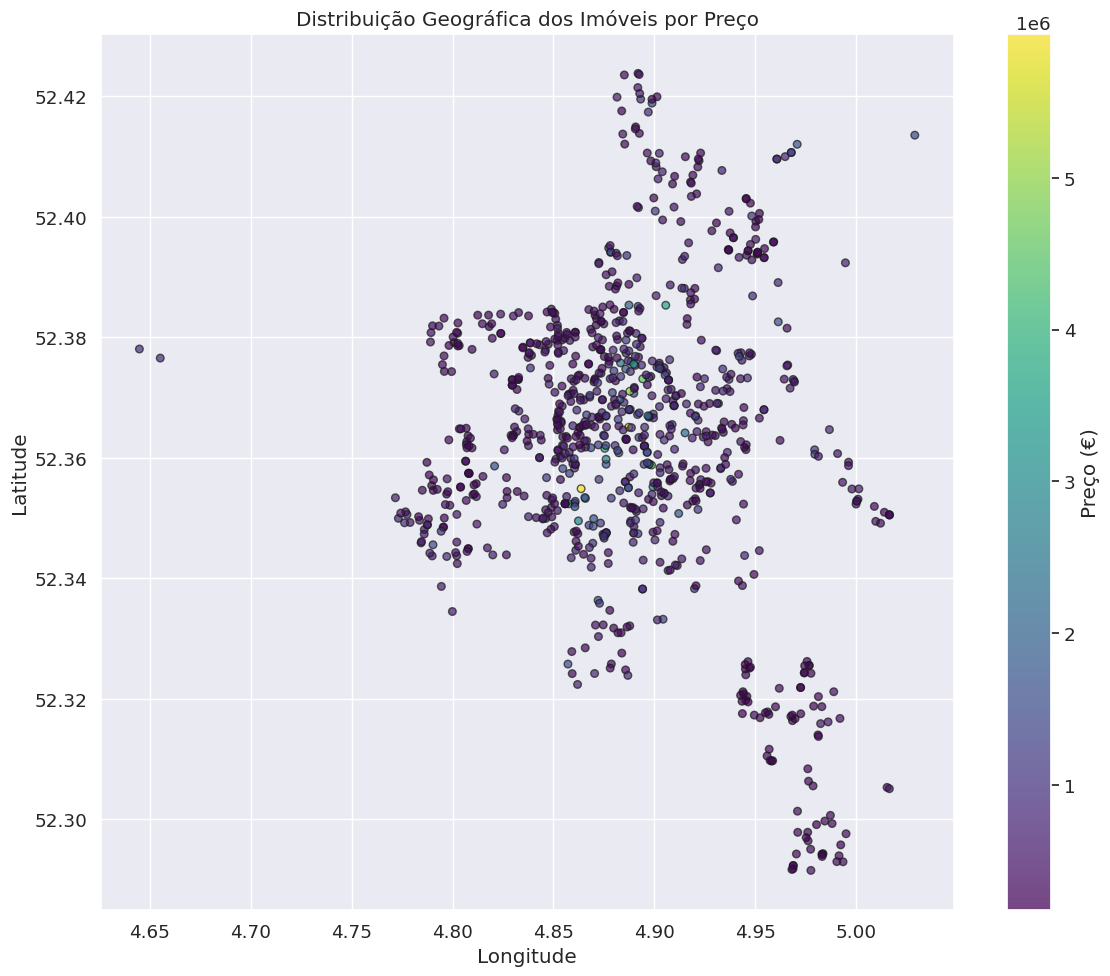

In [13]:
# Visualizar distribuição geográfica dos imóveis
plt.figure(figsize=(12, 10))
scatter = plt.scatter(data['Lon'], data['Lat'], c=data['Price'].values,
                     cmap='viridis', alpha=0.7, s=30, edgecolor='k')
plt.colorbar(scatter, label='Preço (€)')
plt.title('Distribuição Geográfica dos Imóveis por Preço')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.tight_layout()
plt.savefig('distribuicao_geografica.png')


In [14]:
# 3. Preparação dos Dados para Modelagem
print("\n=== PREPARAÇÃO DOS DADOS PARA MODELAGEM ===")

# Estratégia para lidar com dados faltantes
if missing_data.sum() > 0:
    print("Tratando valores ausentes...")
    for col in missing_data[missing_data > 0].index:
        if data[col].dtype == np.number:
            data[col].fillna(data[col].median(), inplace=True)
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)

    print("Valores ausentes foram tratados.")

print("\nDados faltantes após tratamento:")
print(data.isnull().sum()[data.isnull().sum() > 0])


=== PREPARAÇÃO DOS DADOS PARA MODELAGEM ===
Tratando valores ausentes...
Valores ausentes foram tratados.

Dados faltantes após tratamento:
Series([], dtype: int64)


<ipython-input-14-3fe168e41a8f>:8: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if data[col].dtype == np.number:
<ipython-input-14-3fe168e41a8f>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)


Podemos extrair informações dos códigos postais (Zip) para criar novas variáveis

In [21]:
# Último dígito do CEP pode representar uma região de Amsterdam
print("\nExtraindo informações dos códigos postais:")
data['ZipPrefix'] = data['Zip'].astype(str).str[2 and 3]
print(data[['Zip', 'ZipPrefix']].head())


Extraindo informações dos códigos postais:
       Zip ZipPrefix
1  1091 CR         1
2  1059 EL         9
3  1097 SM         7
4  1060 TH         0
5  1036 KN         6


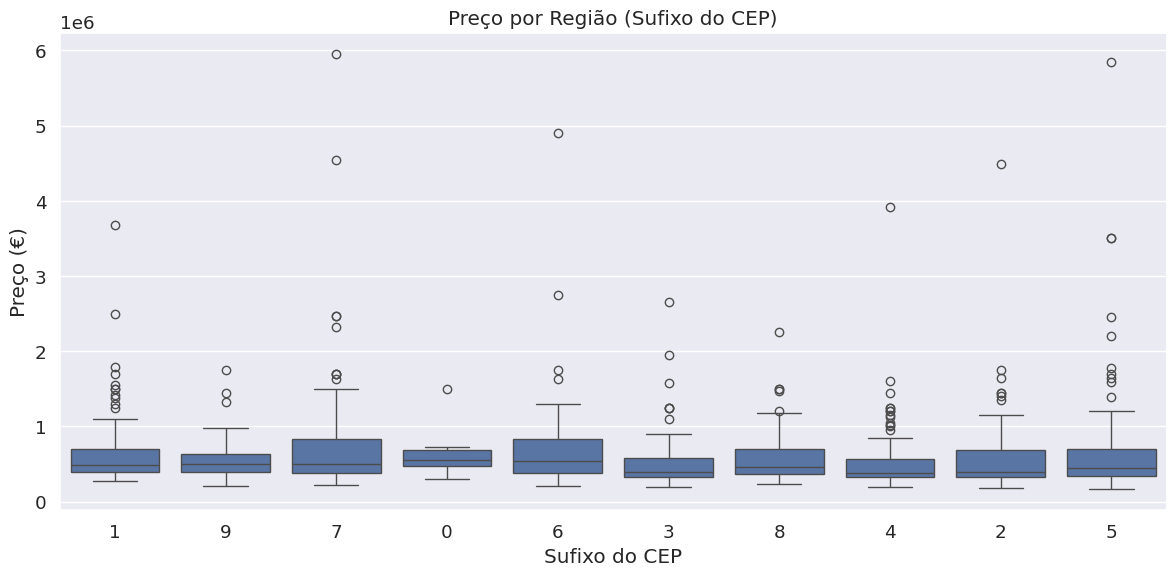

In [22]:
# Verificar a distribuição de preços por sufixo de CEP
plt.figure(figsize=(12, 6))
sns.boxplot(x='ZipPrefix', y='Price', data=data)
plt.title('Preço por Região (Sufixo do CEP)')
plt.xlabel('Sufixo do CEP')
plt.ylabel('Preço (€)')
plt.tight_layout()
plt.savefig('boxplot_zipprefix_preco.png')


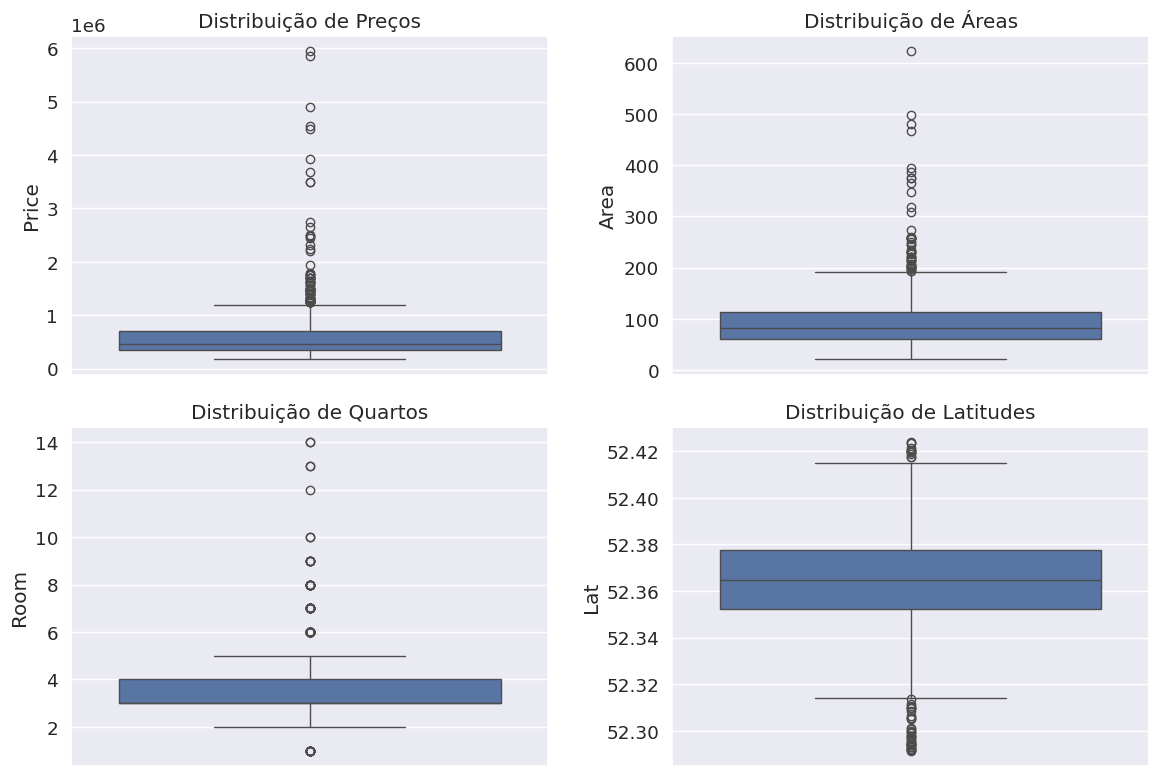

In [23]:
# Verificar se há outliers
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.boxplot(data['Price'])
plt.title('Distribuição de Preços')

plt.subplot(2, 2, 2)
sns.boxplot(data['Area'])
plt.title('Distribuição de Áreas')

plt.subplot(2, 2, 3)
sns.boxplot(data['Room'])
plt.title('Distribuição de Quartos')

plt.subplot(2, 2, 4)
sns.boxplot(data['Lat'])
plt.title('Distribuição de Latitudes')

plt.tight_layout()
plt.savefig('outliers_boxplots.png')


Opção para filtrar outliers extremos (opcional)

In [ ]:
# Define limites para considerar valores extremos
q1_price = data['Price'].quantile(0.25)
q3_price = data['Price'].quantile(0.75)
iqr_price = q3_price - q1_price
lower_bound = q1_price - 3 * iqr_price
upper_bound = q3_price + 3 * iqr_price

print(f"\nIdentificando outliers extremos de preço:")
print(f"Limite inferior: {lower_bound}")
print(f"Limite superior: {upper_bound}")
print(f"Número de outliers de preço: {sum((data['Price'] < lower_bound) | (data['Price'] > upper_bound))}")


Identificando outliers extremos de preço:
Limite inferior: -697750.0
Limite superior: 1747000.0
Número de outliers de preço: 24


In [ ]:
# Remover outliers extremos (opcional - comentado por padrão)
data = data[(data['Price'] >= lower_bound) & (data['Price'] <= upper_bound)]
print(f"Tamanho do dataset após remoção de outliers: {len(data)}")

Tamanho do dataset após remoção de outliers: 900


In [24]:
# 4. Implementação da Regressão Linear
print("\n=== IMPLEMENTAÇÃO DA REGRESSÃO LINEAR ===")

class LinearRegressionFromScratch:
    def __init__(self):
        self.coefficients = None
        self.intercept = None
        self.feature_names = None

    def fit(self, X, y, feature_names=None):
        self.feature_names = feature_names
        # Adicionar coluna de 1s para o intercepto
        X_with_intercept = np.column_stack((np.ones(X.shape[0]), X))

        # Calcular coeficientes usando a equação normal (X'X)^-1 X'y
        X_transpose = X_with_intercept.T
        X_transpose_X = np.dot(X_transpose, X_with_intercept)
        X_transpose_y = np.dot(X_transpose, y)

        # Verificar se a matriz é invertível
        try:
            inv_X_transpose_X = np.linalg.inv(X_transpose_X)
            coefficients = np.dot(inv_X_transpose_X, X_transpose_y)
            self.intercept = coefficients[0]
            self.coefficients = coefficients[1:]
        except np.linalg.LinAlgError:
            print("Erro: A matriz X'X não é invertível. Tente remover variáveis altamente correlacionadas.")
            return None

    def predict(self, X):
        if self.coefficients is None or self.intercept is None:
            raise Exception("Modelo ainda não foi treinado.")
        return self.intercept + np.dot(X, self.coefficients)

    def r_squared(self, y_true, y_pred):
        ss_total = np.sum((y_true - np.mean(y_true))**2)
        ss_residual = np.sum((y_true - y_pred)**2)
        return 1 - (ss_residual / ss_total)

    def summary(self):
        if self.coefficients is None:
            return "Modelo não treinado"

        result = "===== Resumo do Modelo de Regressão Linear =====\n"
        result += f"Intercepto: {self.intercept:.4f}\n\n"
        result += "Coeficientes:\n"

        if self.feature_names is not None:
            for name, coef in zip(self.feature_names, self.coefficients):
                result += f"{name}: {coef:.4f}\n"
        else:
            for i, coef in enumerate(self.coefficients):
                result += f"Variável {i+1}: {coef:.4f}\n"

        return result


=== IMPLEMENTAÇÃO DA REGRESSÃO LINEAR ===


In [25]:
# 5. Preparação Final e Treinamento do Modelo
print("\n=== PREPARAÇÃO FINAL E TREINAMENTO DO MODELO ===")

# Preparar o conjunto de dados para o modelo
selected_features = ['Area', 'Room', 'Lon', 'Lat', 'ZipPrefix']
print("\nCaracterísticas selecionadas para o modelo:")
print(selected_features)

# Selecionar as features e a variável alvo
X = data[selected_features].copy()
y = data['Price'].values

# Converter variáveis categóricas (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)
feature_names = X.columns.tolist()

# Normalizar os dados (importante para interpretação dos coeficientes)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
model = LinearRegressionFromScratch()
model.fit(X_train, y_train, feature_names)


=== PREPARAÇÃO FINAL E TREINAMENTO DO MODELO ===

Características selecionadas para o modelo:
['Area', 'Room', 'Lon', 'Lat', 'ZipPrefix']


In [26]:
# 6. Avaliação do Modelo
if model.coefficients is None:
    print("\nModelo não foi treinado devido a um erro na matriz (X'X). Abortando avaliação.")
else:
    print("\n=== AVALIAÇÃO DO MODELO ===")

    # Fazer previsões
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcular métricas de avaliação
    train_r2 = model.r_squared(y_train, y_train_pred)
    test_r2 = model.r_squared(y_test, y_test_pred)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print("\nMétricas de Avaliação:")
    print(f"R² (treino): {train_r2:.4f}")
    print(f"R² (teste): {test_r2:.4f}")
    print(f"RMSE (treino): {train_rmse:.2f} €")
    print(f"RMSE (teste): {test_rmse:.2f} €")
    print(f"MAE (treino): {train_mae:.2f} €")
    print(f"MAE (teste): {test_mae:.2f} €")

    # Exibir resumo do modelo
    print("\n" + model.summary())



=== AVALIAÇÃO DO MODELO ===

Métricas de Avaliação:
R² (treino): 0.6397
R² (teste): 0.8074
RMSE (treino): 290528.74 €
RMSE (teste): 311133.97 €
MAE (treino): 166696.19 €
MAE (teste): 181397.58 €

===== Resumo do Modelo de Regressão Linear =====
Intercepto: 615499.3453

Coeficientes:
Area: 479692.0128
Room: -79118.5178
Lon: -23826.4170
Lat: 5630.7919
ZipPrefix_1: 139634.4976
ZipPrefix_2: 128223.0335
ZipPrefix_3: 121900.7967
ZipPrefix_4: 102190.5887
ZipPrefix_5: 138268.0892
ZipPrefix_6: 105240.0588
ZipPrefix_7: 138682.1248
ZipPrefix_8: 104443.2088
ZipPrefix_9: 78281.5426




=== VISUALIZAÇÃO DOS RESULTADOS ===


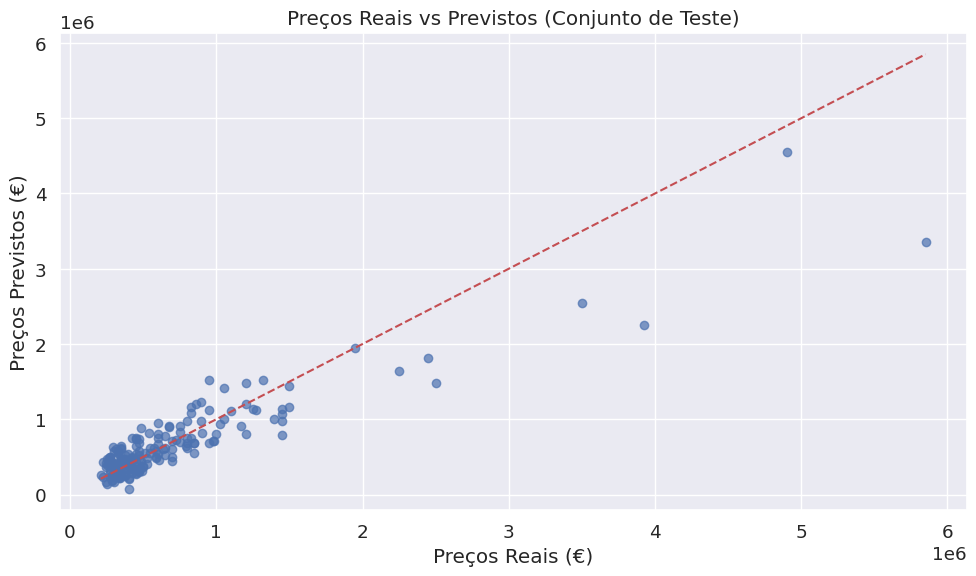

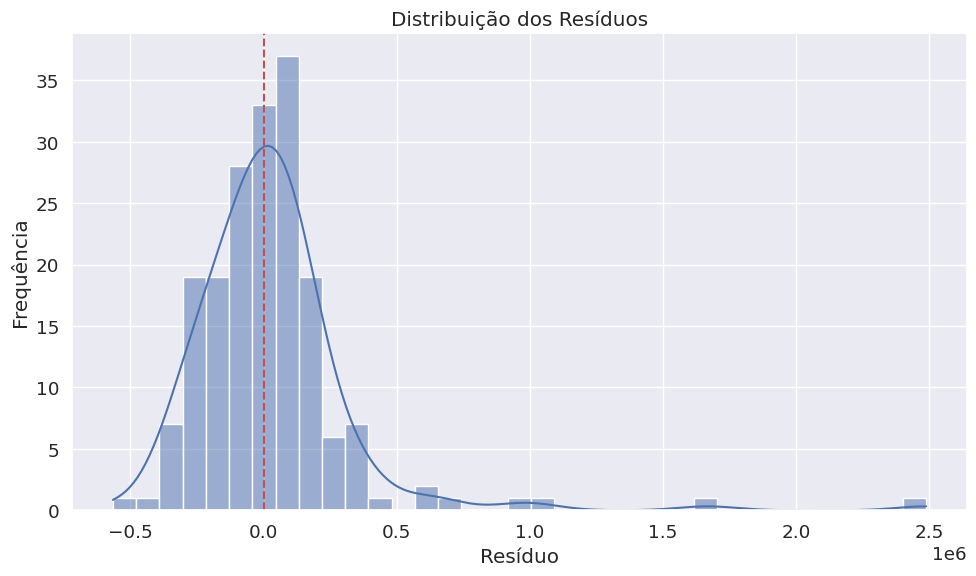

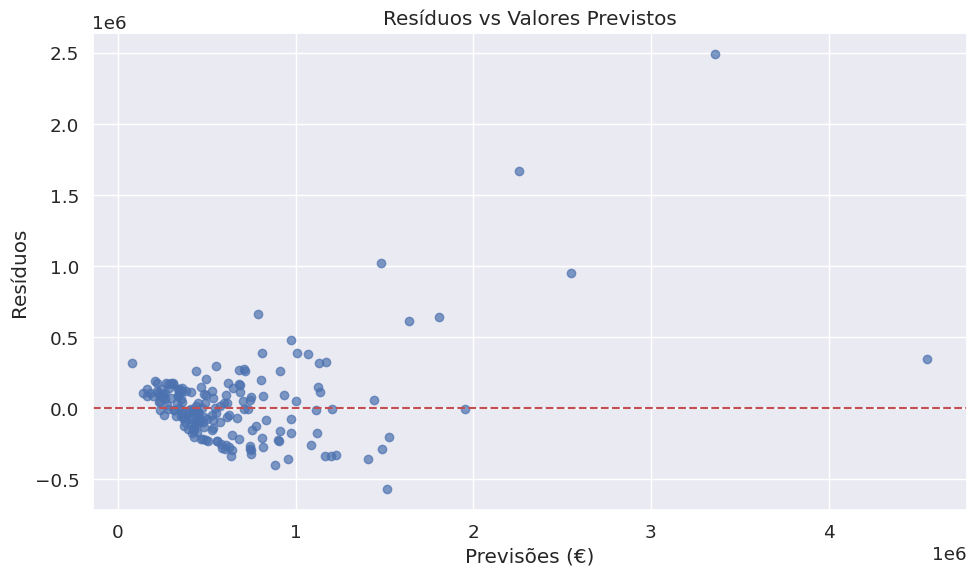

In [28]:
    # 7. Visualização dos Resultados
    print("\n=== VISUALIZAÇÃO DOS RESULTADOS ===")

    # Comparar valores reais vs previstos (conjunto de teste)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, y_test_pred, alpha=0.7)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
    plt.xlabel("Preços Reais (€)")
    plt.ylabel("Preços Previstos (€)")
    plt.title("Preços Reais vs Previstos (Conjunto de Teste)")
    plt.tight_layout()
    plt.savefig('previstos_vs_reais.png')

    # Análise de resíduos
    residuals = y_test - y_test_pred

    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True)
    plt.title('Distribuição dos Resíduos')
    plt.xlabel('Resíduo')
    plt.ylabel('Frequência')
    plt.axvline(x=0, color='r', linestyle='--')
    plt.tight_layout()
    plt.savefig('distribuicao_residuos.png')


    # Resíduos vs valores previstos (para verificar homoscedasticidade)
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_pred, residuals, alpha=0.7)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel("Previsões (€)")
    plt.ylabel("Resíduos")
    plt.title("Resíduos vs Valores Previstos")
    plt.tight_layout()
    plt.savefig('residuos_vs_previstos.png')



=== INTERPRETAÇÃO DO MODELO ===

Interpretação dos coeficientes:
Os coeficientes indicam quanto o preço muda (em €) quando a variável correspondente
aumenta em uma unidade de desvio padrão (dados foram normalizados).

As variáveis mais importantes para o modelo são:
- Area: 479692.0128
- ZipPrefix_1: 139634.4976
- ZipPrefix_7: 138682.1248
- ZipPrefix_5: 138268.0892
- ZipPrefix_2: 128223.0335
- ZipPrefix_3: 121900.7967
- ZipPrefix_6: 105240.0588
- ZipPrefix_8: 104443.2088
- ZipPrefix_4: 102190.5887
- Room: 79118.5178
- ZipPrefix_9: 78281.5426
- Lon: 23826.4170
- Lat: 5630.7919


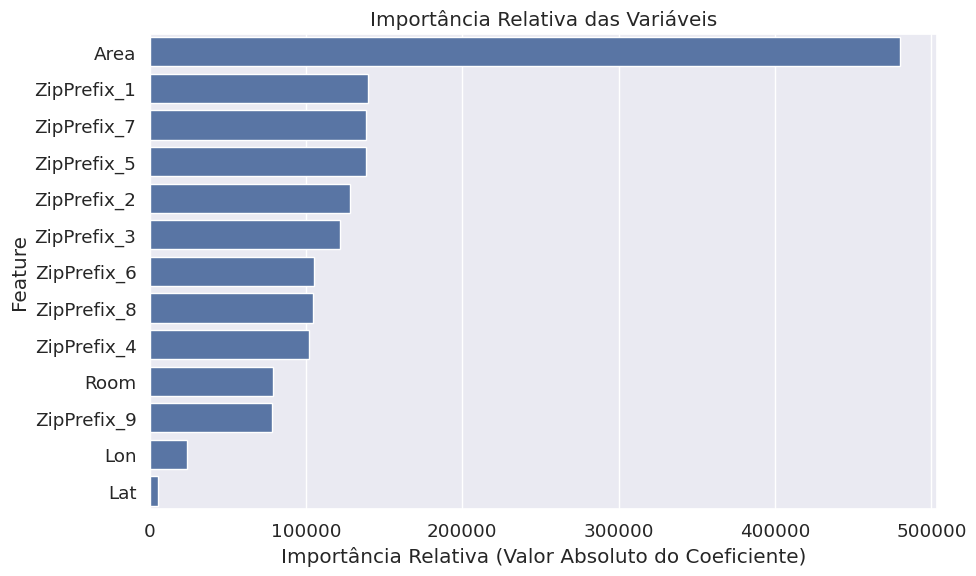

In [29]:
    # 8. Interpretação do Modelo
    print("\n=== INTERPRETAÇÃO DO MODELO ===")

    print("\nInterpretação dos coeficientes:")
    print("Os coeficientes indicam quanto o preço muda (em €) quando a variável correspondente")
    print("aumenta em uma unidade de desvio padrão (dados foram normalizados).")

    # Calcular importância relativa das variáveis (usando o valor absoluto dos coeficientes normalizados)
    importance = np.abs(model.coefficients)
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importance
    })
    feature_importance = feature_importance.sort_values('Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance)
    plt.title('Importância Relativa das Variáveis')
    plt.xlabel('Importância Relativa (Valor Absoluto do Coeficiente)')
    plt.tight_layout()
    plt.savefig('importancia_variaveis.png')


    print("\nAs variáveis mais importantes para o modelo são:")
    for idx, row in feature_importance.iterrows():
        print(f"- {row['Feature']}: {row['Importance']:.4f}")

In [30]:
# 9. Conclusão
print("\n=== CONCLUSÃO ===")
print("\nO modelo de regressão linear foi treinado e avaliado com sucesso.")
print(f"O modelo explica aproximadamente {test_r2*100:.1f}% da variação nos preços de imóveis em Amsterdam,")
print(f"com um erro médio absoluto de {test_mae:.2f} euros.")

if abs(train_r2 - test_r2) > 0.1:
    print("\nATENÇÃO: A diferença entre o R² de treino e teste sugere possível overfitting.")
elif test_r2 < 0.5:
    print("\nATENÇÃO: O baixo valor de R² sugere que o modelo pode estar sofrendo de underfitting.")
    print("Considere incluir mais variáveis ou interações entre variáveis.")
else:
    print("\nO modelo parece estar bem ajustado aos dados, sem sinais claros de overfitting ou underfitting.")




=== CONCLUSÃO ===

O modelo de regressão linear foi treinado e avaliado com sucesso.
O modelo explica aproximadamente 80.7% da variação nos preços de imóveis em Amsterdam,
com um erro médio absoluto de 181397.58 euros.

ATENÇÃO: A diferença entre o R² de treino e teste sugere possível overfitting.


In [34]:
# 10. Exemplo de Previsão
print("\n=== EXEMPLO DE PREVISÃO ===")

# Selecionar um imóvel aleatório do conjunto de teste para previsão
sample_idx = np.random.randint(0, len(X_test))
sample_property_scaled = X_test[sample_idx]
sample_actual_price = y_test[sample_idx]
sample_predicted_price = y_test_pred[sample_idx]

print(f"\nExemplo de imóvel do conjunto de teste (valores normalizados):")
print(f"Características do imóvel:")
for feature, value in zip(feature_names, sample_property_scaled):
    print(f"- {feature}: {value:.4f} (Coeficiente: {model.coefficients[feature_names.index(feature)]:.4f})")

print(f"\nPreço real: {sample_actual_price:.2f} €")
print(f"Preço previsto: {sample_predicted_price:.2f} €")
print(f"Diferença: {abs(sample_actual_price - sample_predicted_price):.2f} € ({abs(sample_actual_price - sample_predicted_price)/sample_actual_price*100:.2f}%)")


=== EXEMPLO DE PREVISÃO ===

Exemplo de imóvel do conjunto de teste (valores normalizados):
Características do imóvel:
- Area: -0.5391 (Coeficiente: 479692.0128)
- Room: -0.9874 (Coeficiente: -79118.5178)
- Lon: 1.3088 (Coeficiente: -23826.4170)
- Lat: -2.2346 (Coeficiente: 5630.7919)
- ZipPrefix_1: -0.3325 (Coeficiente: 139634.4976)
- ZipPrefix_2: 2.8388 (Coeficiente: 128223.0335)
- ZipPrefix_3: -0.3714 (Coeficiente: 121900.7967)
- ZipPrefix_4: -0.3638 (Coeficiente: 102190.5887)
- ZipPrefix_5: -0.3752 (Coeficiente: 138268.0892)
- ZipPrefix_6: -0.3058 (Coeficiente: 105240.0588)
- ZipPrefix_7: -0.4244 (Coeficiente: 138682.1248)
- ZipPrefix_8: -0.3405 (Coeficiente: 104443.2088)
- ZipPrefix_9: -0.2705 (Coeficiente: 78281.5426)

Preço real: 225000.00 €
Preço previsto: 426738.95 €
Diferença: 201738.95 € (89.66%)
